<h1 align=center> Gradient Boosting In Depth </h1>

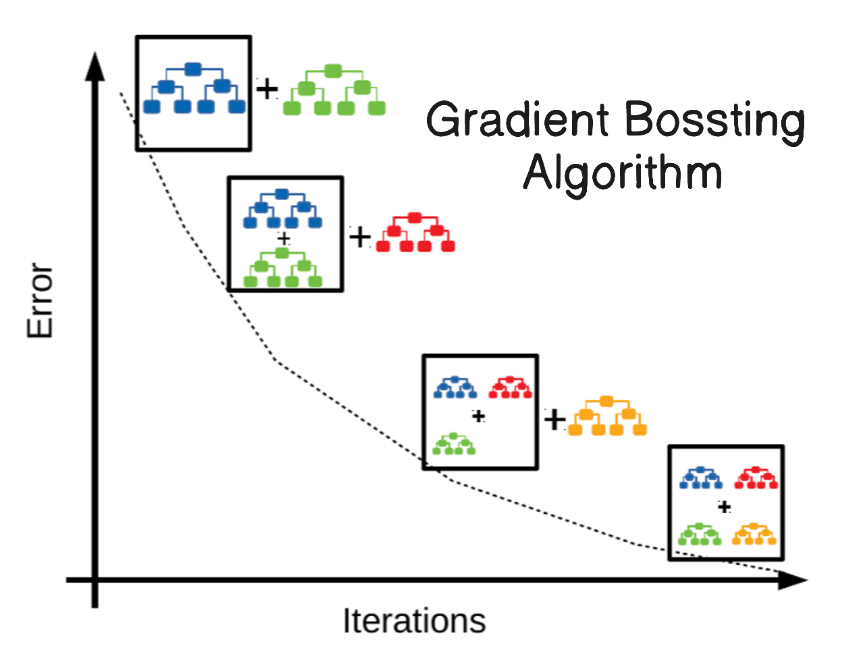

- Supervised learning algorithm
- Used for regression and classification problems
- Decision tree based ensemble learning algorithm
- Sequential ensemble learning
- Not require feature scaling
- It works well to use with imbalance dataset
- Not sensitive to outliers
- Often slightly more accurate than random forests, slower to train but faster to predict than random forest, smaller in memory
- Gradient boosting strategically trains each new model to address the shortcomings of the previous ones

## How It Works:

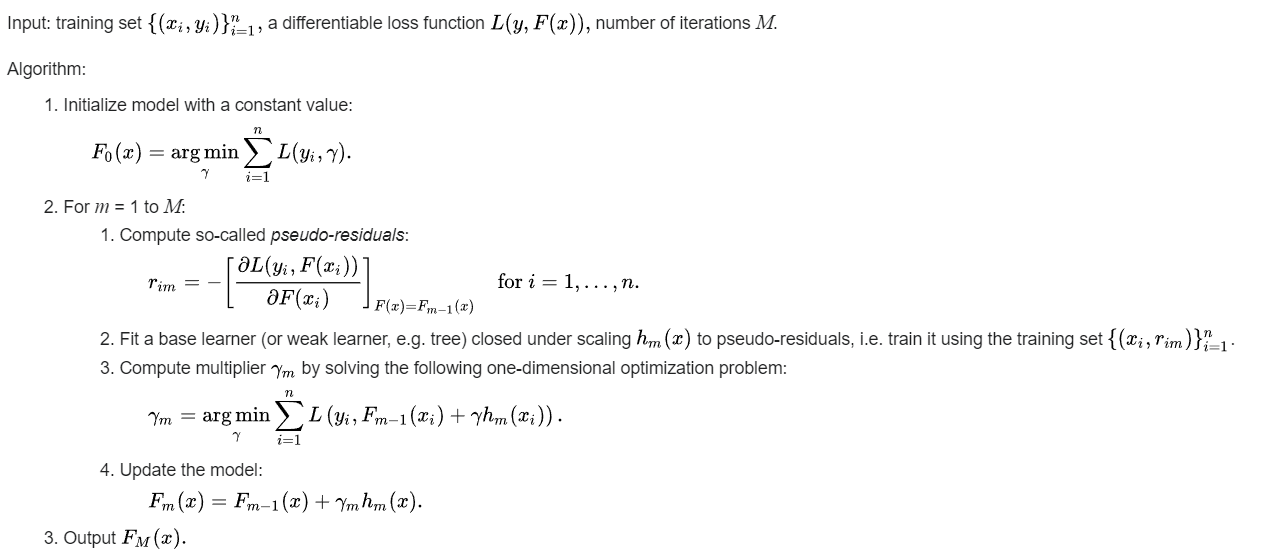

### **1. Initialization:**

- The ensemble starts with an initial model, often a simple one like a single leaf tree or a constant value
- The initial prediction is made by this base model

### **2. Sequential Training:**

- **For each iteration:**
    1. **Compute the residuals:** Calculate the difference between the actual target values and the predictions made by the current ensemble
    2.  **Create a new tree (Fit a base learner):** Train a new weak learner (typically a decision tree) on the residuals. Fit the new model to predict the residuals, rather than the original target values
    3. **Calculate the output values:** In this part, we determine the output values for each leaf
    4. **Make new prediction:** Update the ensemble by adding the new model's predictions scaled by a learning rate
    5. Repeat until a predefined number of iterations (trees) is reached or until a stopping criterion is met
    
    `Note`: Gradient Boosting typically continues adding models until a predefined number of iterations is reached, or until the performance on a validation set fails to improve.
    

### **3. Combining Models:**

- The final prediction is the sum of the initial prediction and the predictions from all subsequent models

### Practical Example For Regression Problem:

- Below is our raw data

| Row No | Cylinder Num | Car Height | Engine Location | Price |
| --- | --- | --- | --- | --- |
| 1 | Four | 48.8 | Front | 12000 |
| 2 | Six | 48.8 | Back | 16500 |
| 3 | Five | 52.4 | Back | 15500 |
| 4 | Four | 54.3 | Front | 14000 |

**Step-1 : Build a Base Mode ⇒ We initialize the model with constant value**

- Mathematically the first step can be written as:

$$
F_0(x)= \underset{\gamma}{\mathrm{argmin}} \sum_{i=0}^{n} L(y, \gamma) \;\; where,\;\gamma: predicted\;value
$$

- Gamma is our predicted value, instead of gamma we will use y_hat
- Since the target column is continuous our loss function will be:

$$
Loss = \sum _{i=1}^{n} \frac{1}{2}(y_i-\hat{y_i})^2
$$

- Our goal is to find the value for gamma(y_hat) to minimize the loss function, and we can find it as below:

$$
L = \frac{1}{2}(12000-\hat{y})^2 + \frac{1}{2}(16500-\hat{y})^2 +\frac{1}{2}(15500-\hat{y})^2 +\frac{1}{2}(14000-\hat{y})^2\\ Then\;we\;take\;derivative\;with\;respect\;to\;\hat{y} \; and \;equal\;it\;to\;0 \\ \frac{2}{2}(12000-\hat{y})(-1) + \frac{2}{2}(16500-\hat{y})(-1) +\frac{2}{2}(15500-\hat{y})(-1) +\frac{2}{2}(14000-\hat{y})(-1)=0 \\-12000+\hat{y}-16500+\hat{y}-15500+\hat{y}-14000+\hat{y}=0\\ 4\hat{y} = 58000 \\ \hat{y}=14500
$$

- Hence for the value y_hat=14500, the loss function will be minimum so this value will become our prediction for the *base model*

| Row No | Cylinder Num | Car Height | Engine Location | Price | Prediction 1 |
| --- | --- | --- | --- | --- | --- |
| 1 | Four | 48.8 | Front | 12000 | 14500 |
| 2 | Six | 48.8 | Back | 16500 | 14500 |
| 3 | Five | 52.4 | Back | 15500 | 14500 |
| 4 | Four | 54.3 | Front | 14000 | 14500 |

**Step-2: is a loop where we make all of the trees (for m=1 to M)**

- Little m refers to individual tree, so when m=1 we are talking about the first tree

**Part(a): Calculate the pseudo residuals** 

- pseudo_residuals = (observed value – predicted value)

$$
r_{im} = -\left[ \frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x)=F_{m-1}(x)} \;\; for\;i=1,...,n

$$

- *r:* is the pseudo-residual
- i: is the sample number
- m: is the tree that we are trying to build
- 𝑦_𝑖: is the true target value for the *i*th instance
- 𝐹(𝑥_𝑖): is the current prediction of the model for the *i*th instance
- 𝐿: is the loss function

`Note`: We can prove that pseudo residuals is  (observed value – predicted value) as shown below:

$$
Loss =  \frac{1}{2}(y-\hat{y})^2 \\ \frac{\partial L}{\partial \hat{y}} = \frac{2}{2}(y-\hat{y})(-1)=(\hat{y}-y)\\ +\frac{\partial L}{\partial \hat{y}}=-(y-\hat{y}) \\ -\frac{\partial L}{\partial \hat{y}}=(y-\hat{y}) \\ -\frac{\partial L(y_i, F(x_i))}{\partial F(x_i)} = (y-\hat{y})
$$

- When m=1, the pseudo residuals are below:

$$
r_{1,1} = (12000-14500)=-2500\\ r_{2,1} = (16500-14500) = 2000 \\ r_{3,1} = (15500-14500) = 1000 \\ r_{4,1} = (140000-14500) = -500
$$

| Row No | Cylinder Num | Car Height | Engine Location | Price | Prediction 1 | Residual 1 |
| --- | --- | --- | --- | --- | --- | --- |
| 1 | Four | 48.8 | Front | 12000 | 14500 | -2500 |
| 2 | Six | 48.8 | Back | 16500 | 14500 | 2000 |
| 3 | Five | 52.4 | Back | 15500 | 14500 | 1000 |
| 4 | Four | 54.3 | Front | 14000 | 14500 | -500 |

**Part(b): Fit a base learner hm(x)**

- Let’s say **hm(x)** is our DT (regressor tree) made on these residuals
- We will build a model on these pseudo residuals and make predictions. Why do we do this? Because we want to minimize these residuals and minimizing the residuals will eventually improve our model accuracy and prediction power
- So, using the Residual as target and the original feature Cylinder number, cylinder height, and Engine location we will generate new predictions
- `Note` that the predictions, in this case, will be the error values, not the predicted car price values since our target column is an error now
- Here is our new tree

![alt text](../Images/ml/gboost1.png)

- The Residual for the first sample, x1, goes to the leaf on the left
- The Residual for the second and third sample, x2 and x3, goes to the leaf on the middle
- The Residual for the fourth sample, x4, goes to the leaf on the right

**Part(c): In this part, we determine the output values for each leaf**

- After training a decision tree to predict the pseudo-residuals, each instance will be assigned to a specific leaf node in the tree. It's possible that multiple instances end up in the same leaf node
- That means there might be a case where 1 leaf gets more than 1 residual, hence we need to find the final output of all the leaves. To find the output we can simply take the average of all the numbers in a leaf, doesn’t matter if there is only 1 number or more than 1

Mathematically this step can be represented as below:

$$
for\;j=1...J_m\; compute\;\gamma_{jm}= \underset{\gamma}{\mathrm{argmin}} \sum_{x_i \in R_{ij}} L(y_i, F_{m-1}(x_i) + \gamma)
$$

- For each leaf in the new tree, we compute an output value gamma
- The output value for each leaf is the value for gamma that minimizes this summation
- In step-1 the summation included all of the samples. While, this summation is picky about which samples it includes, for example: x1 is used to calculate the output  value for R_1,1
- One small difference with step-1 minimization is that now we are taking the previous prediction into account

1. Let`s start by calculating the output value for the leaf on the left, R_1,1:
- j=1 → since it is first leaf
- m=1 → since this is the first tree

$$
\gamma_{1,1}= \underset{\gamma}{\mathrm{argmin}} \sum_{x_i \in R_{ij}} L(y_i, F_{m-1}(x_i) + \gamma) \\ \gamma_{1,1} =\underset{\gamma}{\mathrm{argmin}} \sum_{x_i \in R_{ij}} \frac{1}{2}(y_i -( F_{m-1}(x_i) + \gamma))^2 \\ y_i=y_1=12000\\ F_{m-1}(x_i)=F_0(x_1)=14500\\ \gamma_{1,1} =\underset{\gamma}{\mathrm{argmin}}  \frac{1}{2}(12000 -( 14500 + \gamma))^2\\ \gamma_{1,1} =\underset{\gamma}{\mathrm{argmin}}  \frac{1}{2}(-2500 - \gamma))^2 \\ Now\;we\;take\;derivative\;and \;equal\;it\;to\;zero:\\  \frac{2}{2}(-2500 - \gamma))(-1)=0 \\  2500 + \gamma = 0 \\ it \;means\; the \; leaf,\; R_{1,1}, \;output \;value \;is:\\ \gamma_{1,1}=-2500
$$

1. Let`s start by calculating the output value for the leaf on the middle, R_2,1:
- j = 2 → since it is second leaf
- m = 1 → since this is the first tree

$$
\gamma_{2,1} =\underset{\gamma}{\mathrm{argmin}} \sum_{x_i \in R_{ij}} \frac{1}{2}(y_i -( F_{m-1}(x_i) + \gamma))^2\\ \gamma_{2,1} =\underset{\gamma}{\mathrm{argmin}} \left[ \frac{1}{2}(y_2 -( F_0(x_2) + \gamma))^2 + \frac{1}{2}(y_3 -( F_0(x_3) + \gamma))^2 \right] \\ \gamma_{2,1} =\underset{\gamma}{\mathrm{argmin}} \left[ \frac{1}{2}(16500 -( 14500 + \gamma))^2 + \frac{1}{2}(15500 -( 14500 + \gamma))^2 \right] \\ \gamma_{2,1} =\underset{\gamma}{\mathrm{argmin}} \left[ \frac{1}{2}( 2000 - \gamma))^2 + \frac{1}{2}(1000 - \gamma))^2 \right]\\Now\;take\;derivative:\;with\;respect\;to\; gamma \\ 2\gamma-3000=0 \\ \gamma = 1500 \\That\;means:\gamma_{2,1} = 1500 
$$

- So the value for this equation to minimize that equation is 1500

1. Finally, let`s start by calculating the output value for the leaf on the right, R_3,1:
- j = 3 → since it is second leaf
- m = 1 → since this is the first tree

$$
\gamma_{3,1} =\underset{\gamma}{\mathrm{argmin}} \sum_{x_i \in R_{ij}} \frac{1}{2}(y_i -( F_{m-1}(x_i) + \gamma))^2\\ \gamma_{3,1} =\underset{\gamma}{\mathrm{argmin}} \frac{1}{2}(y_4 -( F_0(x_4) + \gamma))^2 \\ \gamma_{3,1} =\underset{\gamma}{\mathrm{argmin}} \frac{1}{2}(14000 -( 14500 + \gamma))^2 \\ \gamma_{3,1} =\underset{\gamma}{\mathrm{argmin}} \frac{1}{2}(-500 - \gamma))^2 \\Now\;take\;derivative:\;with\;respect\;to\; gamma \\ \gamma+500=0 \\ \gamma = -500 \\That\;means:\gamma_{3,1} = -500 
$$

Our DT after calculating the output of all the leaves is:

![alt text](../Images/ml/gboost2.png)

- That`s great! Now jump to the next step 😎

**Part(d): Update the model**

- In this step we have to update the predictions of the previous model. It can be updated as:

$$
F_m(x)=F_{m-1}(x)+ \nu_m h_m(x)
$$

- *F_m-1*(*x_i*): is the previous ensemble's prediction for instance *i*
- h_m(x_i): is the prediction of the new weak learner for instance *i*
- v →nu: is the learning rate or shrinkage parameter, which controls the contribution of the new model to the ensemble
- The learning rate nu scales the contribution of the new weak learner's predictions, controlling the step size of the update

**Now we will use F1(x) to make new prediction for each sample:**

- nu→ we will take 0.1for this example

$$
We\;will\;start\;for\;first\;sample\;x_1: \\ F_1(x)=F_0(x)+ \nu_m h_m(x) \\  F_1(x)= 14500 + 0.1 * (-2500) \\ F_1(x)= 14250
$$

$$
For\;second\;sample\;x_2: \\ F_1(x)=F_0(x)+ \nu_m h_m(x) \\  F_1(x)= 14500 + 0.1 * (1500) \\ F_1(x)= 14650
$$

$$
For\;third\;sample\;x_3: \\ F_1(x)=F_0(x)+ \nu_m h_m(x) \\  F_1(x)= 14500 + 0.1 * (1500) \\ F_1(x)= 14650
$$

$$
For\;fourth\;sample\;x_4: \\ F_1(x)=F_0(x)+ \nu_m h_m(x) \\  F_1(x)= 14500 + 0.1 * (-500) \\ F_1(x)= 14450
$$

**Step-3: Output F_M(x)**

- Imagine M=2
- In the below two images, the base model value is 73.3 and it is a different example from the one I used above
- In our example, the base model value was 14500
- For more clarity you can refer to the below images, to get to know the final step

![alt text](../Images/ml/gboost6.png)

- If we get new data, it will be predicted as below

![alt text](../Images/ml/gboost7.png)


## How Gradient Boost Used For Classification:

- I recommend you these two videos which will cover a great explanations of practical example gradient boosting in classification problems
1. [First Video Link](https://www.youtube.com/watch?v=jxuNLH5dXCs&ab_channel=StatQuestwithJoshStarmer)
2. [Second Video Link](https://www.youtube.com/watch?v=StWY5QWMXCw&ab_channel=StatQuestwithJoshStarmer) 

### **Advantages:**

- High predictive accuracy
- Handles heterogenous data
- Provides insight into feature importance
- Robustness to overfitting with proper tuning

### **Disadvantages:**

- Computationally expensive due to sequential training
- Requires careful parameter tuning
- Sensitive to noisy data
- Models can be complex, making interpretation challenging

In [1]:
# Gradient boost for regression problems
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

X, y = make_regression(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train, y_train)

print(reg.predict(X_test[1:2]))
print(reg.score(X_test, y_test))

[-61.05212593]
0.4379326910967305


In [3]:
# Gradient boost for classificatoin problems
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

X, y = make_hastie_10_2(random_state=0)
X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.913
